## Flight Price Prediction

In [357]:
# Importing Laibraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set()

In [358]:
# Loading Dataset
df = pd.read_excel(r'C:\Users\DELL\Desktop\internship projects\flight price predic_dataset.xlsx')
df

,Airline,Source,Destination,Duration,Total stops,Price,Date
0,IndiGo,pune,chennai,1h 45m,nonstop,451Â SAR,2022-06-05
1,IndiGo,pune,chennai,1h 45m,nonstop,375Â SAR,2022-06-05
2,IndiGo,pune,chennai,1h 40m,nonstop,344Â SAR,2022-06-05
3,IndiGo,pune,chennai,1h 50m,nonstop,416Â SAR,2022-06-05
4,IndiGo,pune,chennai,1h 45m,nonstop,344Â SAR,2022-06-05
...,...,...,...,...,...,...,...
1715,"IndiGo, AirAsia India",MAA,AMD,10h 10m,2 stops,"1,451Â SAR",2022-06-08
1716,Hahn Air Systems,MAA,AMD,9h 45m,1 stop,"1,812Â SAR",2022-06-08
1717,SpiceJet,MAA,AMD,9h 45m,1 stop,"1,896Â SAR",2022-06-08
1718,Hahn Air Systems,MAA,AMD,9h 00m,2 stops,"2,963Â SAR",2022-06-08


### Exploratory Data Analysis (EDA)

In [362]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1720 entries, 0 to 1719
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Airline      1720 non-null   object        
 1   Source       1720 non-null   object        
 2   Destination  1720 non-null   object        
 3   Duration     1720 non-null   object        
 4   Total stops  1720 non-null   object        
 5   Price        1720 non-null   int32         
 6   Date         1720 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int32(1), object(5)
memory usage: 87.5+ KB


In [360]:
#convert price to numerical format
df['Price']=df['Price'].str.replace('[\Â SAR\,]','').astype(int)
df['Price']

0        451
1        375
2        344
3        416
4        344
        ... 
1715    1451
1716    1812
1717    1896
1718    2963
1719    1671
Name: Price, Length: 1720, dtype: int32

Here we change remove the currancy sign and convert the price column into integer

In [363]:
# Checking Data types
df.dtypes

Airline                object
Source                 object
Destination            object
Duration               object
Total stops            object
Price                   int32
Date           datetime64[ns]
dtype: object

In [364]:
#columns name
df.columns

Index(['Airline', 'Source', 'Destination', 'Duration', 'Total stops', 'Price',
       'Date'],
      dtype='object')

In [365]:
# Checking Null Values
df.isnull().sum()

Airline        0
Source         0
Destination    0
Duration       0
Total stops    0
Price          0
Date           0
dtype: int64

In [366]:
df.shape

(1720, 7)

There are 2 columns('Date', 'Duration') that we need to process

In [367]:
#Separating the "Date" column in year, month and day column
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [368]:
#After separating drop the 'Date_of_Journey' column
df.drop('Date', axis = 1, inplace = True)

In [369]:
df.head()

,Airline,Source,Destination,Duration,Total stops,Price,Year,Month,Day
0,IndiGo,pune,chennai,1h 45m,nonstop,451,2022,6,5
1,IndiGo,pune,chennai,1h 45m,nonstop,375,2022,6,5
2,IndiGo,pune,chennai,1h 40m,nonstop,344,2022,6,5
3,IndiGo,pune,chennai,1h 50m,nonstop,416,2022,6,5
4,IndiGo,pune,chennai,1h 45m,nonstop,344,2022,6,5


In [370]:
df.nunique()

Airline         38
Source           5
Destination      5
Duration       140
Total stops      4
Price          561
Year             1
Month            1
Day              8
dtype: int64

In [371]:
# dropping the year column also
df.drop('Year', axis = 1, inplace = True)
df.drop(["Month"], axis = 1, inplace = True)

In [372]:
# converting Duration column into list
duration = list(df["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Checking if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours 
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extract minutes 

In [373]:
# Adding duration_hours and duration_mins list to train_data dataframe

df["Duration_hours"] = duration_hours
df["Duration_mins"] = duration_mins

In [374]:
df.drop(["Duration"], axis = 1, inplace = True)

In [375]:
df.head()

,Airline,Source,Destination,Total stops,Price,Day,Duration_hours,Duration_mins
0,IndiGo,pune,chennai,nonstop,451,5,1,45
1,IndiGo,pune,chennai,nonstop,375,5,1,45
2,IndiGo,pune,chennai,nonstop,344,5,1,40
3,IndiGo,pune,chennai,nonstop,416,5,1,50
4,IndiGo,pune,chennai,nonstop,344,5,1,45


In [376]:
df.shape

(1720, 8)

In [377]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1720 entries, 0 to 1719
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Airline         1720 non-null   object
 1   Source          1720 non-null   object
 2   Destination     1720 non-null   object
 3   Total stops     1720 non-null   object
 4   Price           1720 non-null   int32 
 5   Day             1720 non-null   int64 
 6   Duration_hours  1720 non-null   int64 
 7   Duration_mins   1720 non-null   int64 
dtypes: int32(1), int64(3), object(4)
memory usage: 100.9+ KB


In [378]:
df.nunique()

Airline            38
Source              5
Destination         5
Total stops         4
Price             561
Day                 8
Duration_hours     20
Duration_mins      12
dtype: int64

In [379]:
df.describe()

,Price,Day,Duration_hours,Duration_mins
count,1720.000000,1720.000000,1720.000000,1720.000000
mean,692.881395,6.336628,5.271512,27.200581
std,336.286904,1.574612,3.113913,17.537391
min,320.000000,3.000000,1.000000,0.000000
25%,449.000000,5.000000,2.000000,10.000000
50%,629.500000,6.000000,5.000000,25.000000
75%,811.250000,7.000000,7.000000,45.000000
max,2963.000000,10.000000,27.000000,55.000000


### Visualization

IndiGo                        569
Vistara                       286
GoFirst                       162
Air India                     144
SpiceJet                      125
AirAsia India                  68
IndiGo, GoFirst                54
GoFirst, IndiGo                50
IndiGo, Vistara                41
AirAsia India, IndiGo          32
FlexFlight                     31
Vistara, IndiGo                21
Hahn Air Systems               20
IndiGo, AirAsia India          16
IndiGo, SpiceJet               12
GoFirst, Vistara                9
SpiceJet, Vistara               8
SpiceJet, IndiGo                7
IndiGo, Air India               7
SpiceJet, Air India             7
AirAsia India, GoFirst          6
AirAsia India, SpiceJet         6
GoFirst, Air India              5
Vistara, GoFirst                5
Qatar Airways                   4
Alaska Seaplanes                4
Emirates                        4
Alaska Seaplanes, SpiceJet      3
GoFirst, AirAsia India          3
SpiceJet, AirA

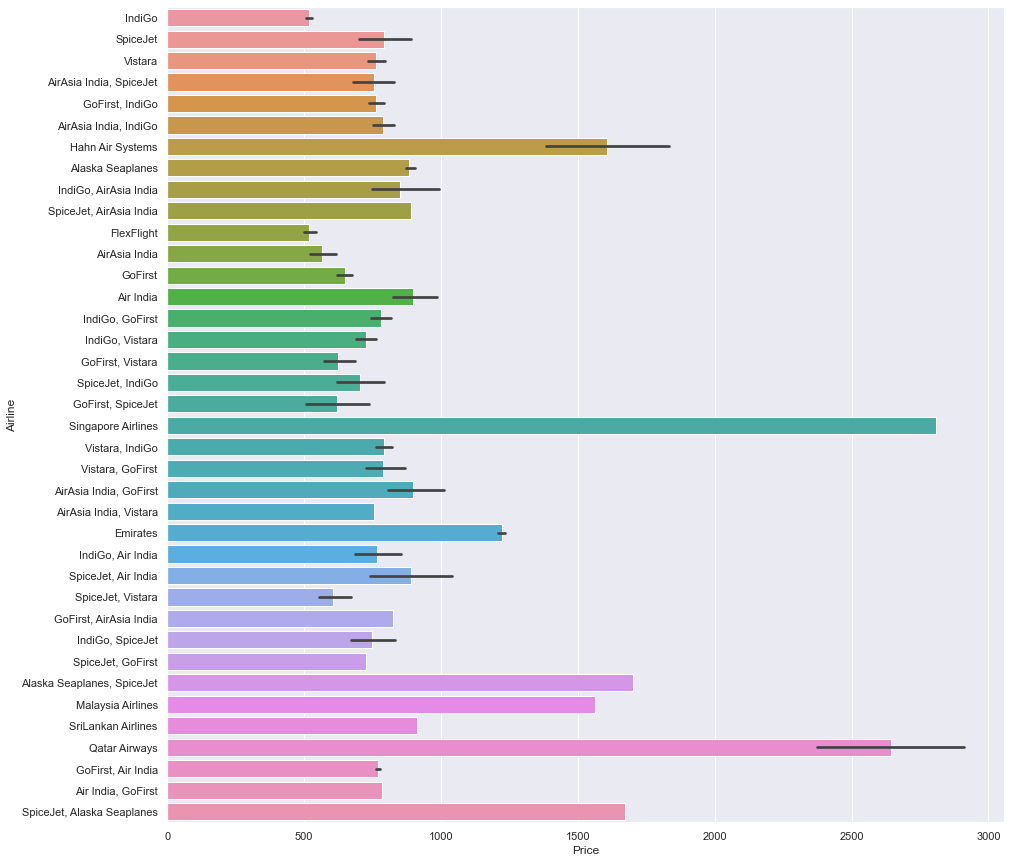

In [386]:
plt.figure(figsize=(15,15))
sns.barplot(y="Airline",x='Price', data=df)
print(df["Airline"].value_counts())

Indigo airline's price is low than other

PNQ     508
DEL     441
MAA     394
BLR     271
pune    106
Name: Source, dtype: int64


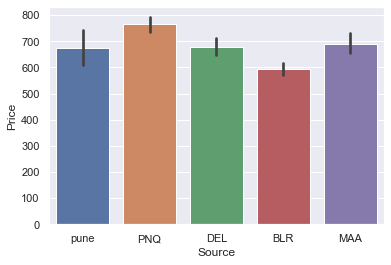

In [387]:
#plt.figure(figsize=(10,5))
sns.barplot(x="Source",y='Price', data=df)
print(df["Source"].value_counts())

DEL        622
BOM        348
AMD        333
CCU        311
chennai    106
Name: Destination, dtype: int64


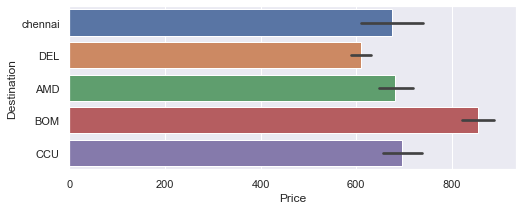

In [388]:
plt.figure(figsize=(8,3))
sns.barplot(y="Destination",x='Price', data=df)
print(df["Destination"].value_counts())

1 stop      1120
nonstop      505
2 stops       88
3 stops        7
Name: Total stops, dtype: int64


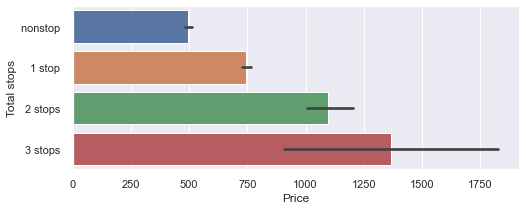

In [389]:
plt.figure(figsize=(8,3))
sns.barplot(y="Total stops",x='Price', data=df)
print(df["Total stops"].value_counts())

6     443
7     353
5     320
8     230
4     211
10     79
9      74
3      10
Name: Day, dtype: int64


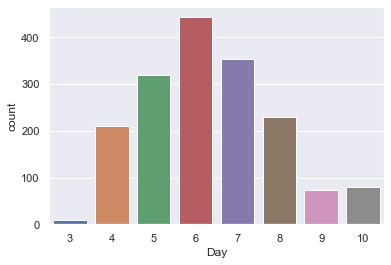

In [390]:
ax = sns.countplot (x = "Day", data = df)
print(df["Day"].value_counts())

2     391
5     319
6     290
7     161
1     106
4      98
9      95
8      81
10     67
11     41
3      31
12     16
14      7
13      4
15      3
16      3
27      3
22      2
23      1
25      1
Name: Duration_hours, dtype: int64


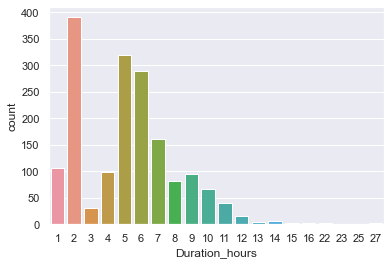

In [391]:
ax = sns.countplot (x = "Duration_hours", data = df)
print(df["Duration_hours"].value_counts())

In [392]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Total stops', 'Price', 'Day',
       'Duration_hours', 'Duration_mins'],
      dtype='object')

In [393]:
#Encoding of Dataframe:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in ('Airline', 'Source', 'Destination', 'Total stops'): df[i] = le.fit_transform(df[i])

In [394]:
df.head()

,Airline,Source,Destination,Total stops,Price,Day,Duration_hours,Duration_mins
0,18,4,4,3,451,5,1,45
1,18,4,4,3,375,5,1,45
2,18,4,4,3,344,5,1,40
3,18,4,4,3,416,5,1,50
4,18,4,4,3,344,5,1,45


In [395]:
# Correlation
df.corr()

,Airline,Source,Destination,Total stops,Price,Day,Duration_hours,Duration_mins
Airline,1.000000,-0.073169,-0.023686,-0.078523,0.027989,0.006215,-0.033263,0.024070
Source,-0.073169,1.000000,-0.028744,-0.165782,0.135506,0.177455,0.199688,-0.063260
Destination,-0.023686,-0.028744,1.000000,0.187322,-0.143975,-0.074896,-0.152161,0.072719
Total stops,-0.078523,-0.165782,0.187322,1.000000,-0.324221,-0.228036,-0.667549,0.023722
Price,0.027989,0.135506,-0.143975,-0.324221,1.000000,0.074897,0.358638,-0.038484
Day,0.006215,0.177455,-0.074896,-0.228036,0.074897,1.000000,0.188382,0.034461
Duration_hours,-0.033263,0.199688,-0.152161,-0.667549,0.358638,0.188382,1.000000,-0.079976
Duration_mins,0.024070,-0.063260,0.072719,0.023722,-0.038484,0.034461,-0.079976,1.000000


<AxesSubplot:>

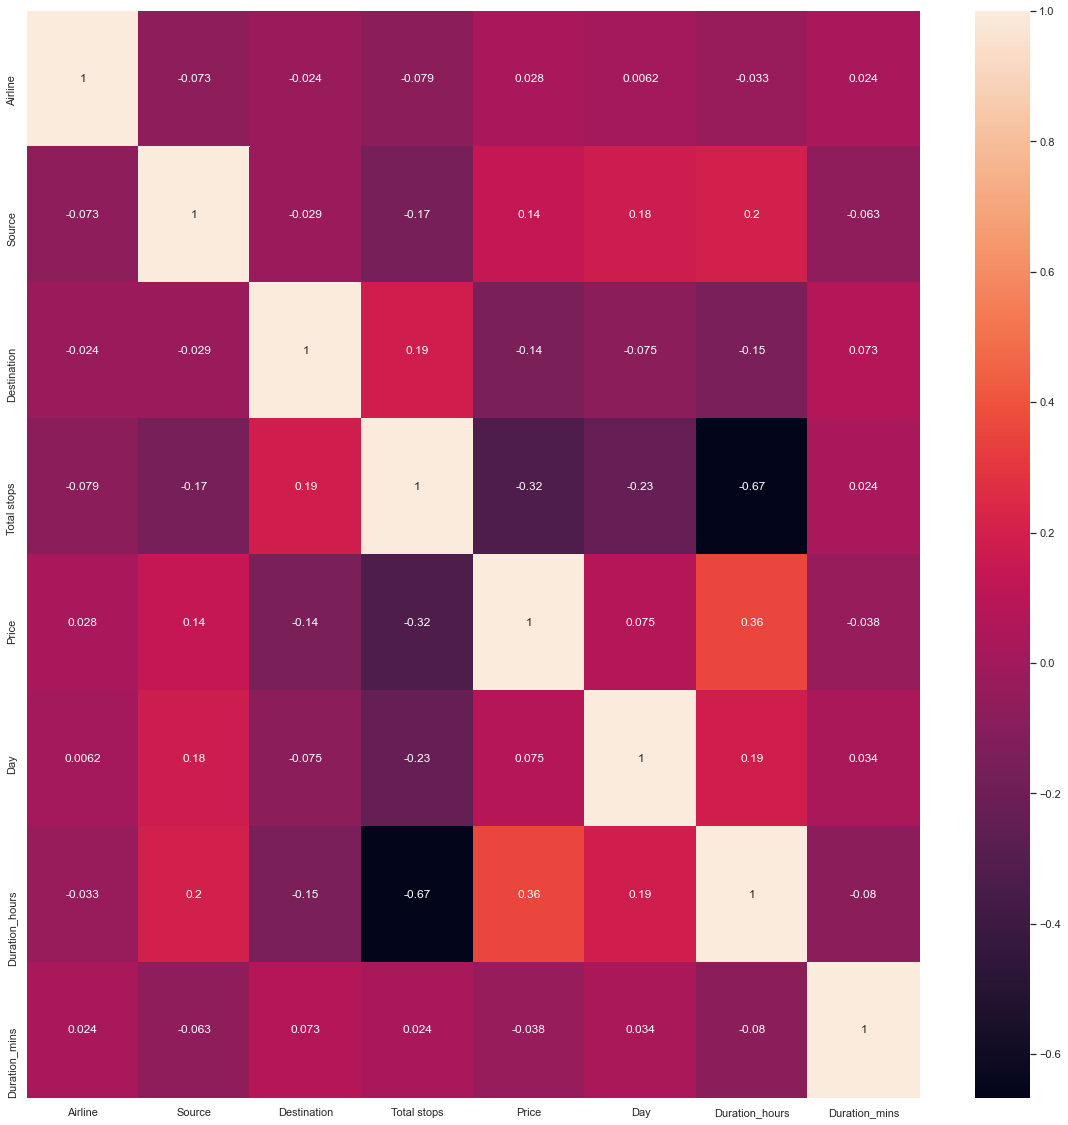

In [396]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

In [397]:
df.skew()

Airline          -0.000690
Source           -0.048290
Destination      -0.203370
Total stops       0.823386
Price             2.577218
Day               0.387743
Duration_hours    1.369746
Duration_mins     0.069887
dtype: float64

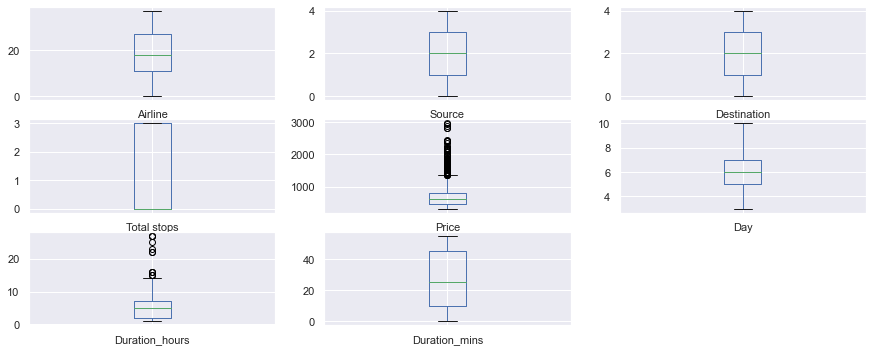

In [398]:
# Outliers Checking
df.plot(kind='box', subplots = True, layout=(5,3), figsize=(15,10));

In [399]:
# Considering the outlier removal
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold=3
np.where(z<3)

(array([   0,    0,    0, ..., 1719, 1719, 1719], dtype=int64),
 array([0, 1, 2, ..., 5, 6, 7], dtype=int64))

In [400]:
df_new_z=df[(z<3).all(axis=1)]
df_new_z

,Airline,Source,Destination,Total stops,Price,Day,Duration_hours,Duration_mins
0,18,4,4,3,451,5,1,45
1,18,4,4,3,375,5,1,45
2,18,4,4,3,344,5,1,40
3,18,4,4,3,416,5,1,50
4,18,4,4,3,344,5,1,45
...,...,...,...,...,...,...,...,...
1711,35,2,0,1,1198,8,10,10
1712,20,2,0,1,1502,8,8,25
1713,17,2,0,0,1656,8,4,40
1715,20,2,0,1,1451,8,10,10


In [257]:
#Percentage loss of data:
Data_loss=((1720 - 1655)/1720)*100
Data_loss

3.77906976744186

Data loss is less so we can remove outliers

In [258]:
df=df_new_z

In [401]:
X = df[['Airline', 'Source', 'Destination', 'Total stops',
       'Day', 'Duration_hours', 'Duration_mins']]

y = df['Price']

In [402]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score, train_test_split, KFold, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn import metrics

In [403]:
# getting feature importance to the target variable "Price".
selection =ExtraTreesRegressor()
selection.fit(X,y)
selection.feature_importances_

array([0.3267302 , 0.06506753, 0.06596841, 0.19682454, 0.10065942,
       0.12810317, 0.11664673])

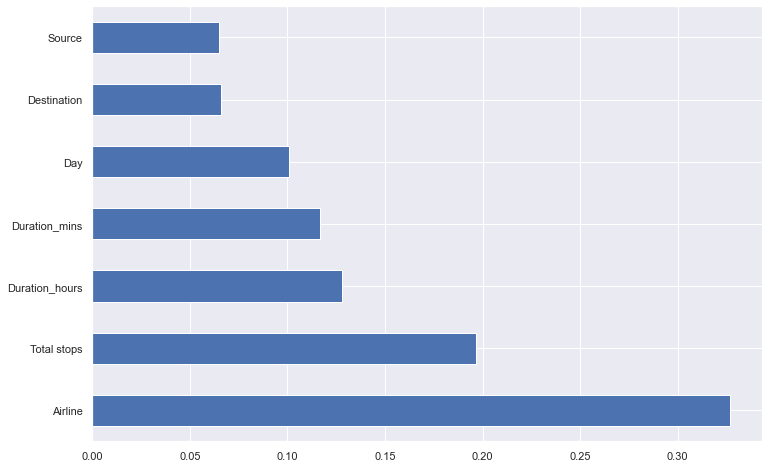

In [404]:
# plotting graph of important features
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_,index = X.columns)
feat_importances.nlargest(20).plot(kind="barh")
plt.show()

## Model Building:

In [405]:
#Splitting the data 60% Train - 20% Val - 20% Test

X_train_or, X_test, y_train_or, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train_or, y_train_or, test_size=0.25)

In [406]:
# Defining a function to get metrics for val set
def get_metrics(model):
    print(f'Train score {model.score(X_train, y_train)}')
    print(f'Val score {model.score(X_val, y_val)}')
    print("MAE:" , metrics.mean_absolute_error(y_val,model.predict(X_val)))
    print("MSE:" , metrics.mean_squared_error(y_val,model.predict(X_val)))
    print("RMSE:" , np.sqrt(metrics.mean_squared_error(y_val,model.predict(X_val))))

In [407]:
#Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
score = lr.score(X_val, y_val)
get_metrics(lr)

Train score 0.1481074962451353
Val score 0.15984723140780477
MAE: 207.86758481019913
MSE: 123036.8740750561
RMSE: 350.7661244690771


In [408]:
#Polynominal
for degree in [1,2,3,4,5]:
    poly = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    poly.fit(X_train, y_train)
    print("-"*20)
    print("Degree", degree)
    get_metrics(poly)

--------------------
Degree 1
Train score 0.1481074962451353
Val score 0.15984723140780488
MAE: 207.86758481019913
MSE: 123036.87407505607
RMSE: 350.76612446907706
--------------------
Degree 2
Train score 0.32321945957679454
Val score 0.26594295507314736
MAE: 185.99196830406794
MSE: 107499.59718862965
RMSE: 327.8713119329437
--------------------
Degree 3
Train score 0.49450678297332684
Val score -0.16287407297890488
MAE: 202.73788381553138
MSE: 170298.06510308778
RMSE: 412.6718612930712
--------------------
Degree 4
Train score 0.6929353034826442
Val score -130.23698853290446
MAE: 770.2670849761364
MSE: 19219110.42341657
RMSE: 4383.960586435121
--------------------
Degree 5
Train score 0.7140395522427422
Val score -606748.3901631037
MAE: 43237.48747799494
MSE: 88855921331.67241
RMSE: 298087.1035983818


In [409]:
#Lasso
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)
get_metrics(lasso_model)

Train score 0.14809074990259585
Val score 0.16030349137007482
MAE: 207.82028234252442
MSE: 122970.05670371377
RMSE: 350.67086663096745


In [410]:
#Ridge
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
get_metrics(ridge_model)

Train score 0.1481074776586342
Val score 0.15987067022243628
MAE: 207.86941505210433
MSE: 123033.44155826619
RMSE: 350.7612315497056


In [411]:
#Random Forest
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
get_metrics(rf)

Train score 0.9150739928377184
Val score 0.6307989819847848
MAE: 112.60738365002246
MSE: 54067.951520337985
RMSE: 232.52516319817514


In [412]:
#Scaling
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

In [413]:
# function to get metrics for scaled features
def scaled_metrics(model):
    print(f'Train score {model.score(X_train_scaled, y_train)}')
    print(f'Val score {model.score(X_val_scaled, y_val)}')
    print("MAE:" , metrics.mean_absolute_error(y_val,model.predict(X_val_scaled)))
    print("MSE:" , metrics.mean_squared_error(y_val,model.predict(X_val_scaled)))
    print("RMSE:" , np.sqrt(metrics.mean_squared_error(y_val,model.predict(X_val_scaled))))

    
## Baseline: Linear Regression

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
score = lr.score(X_val_scaled, y_val)
print("LR")
scaled_metrics(lr)
print("-"*50)

## Polynomial

for degree in [1,2,3,4,5]:
    poly = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    poly.fit(X_train, y_train)
    print("Polynomial - Degree", degree)
    scaled_metrics(poly)
    print("-"*50)

## Lasso

lasso_model = Lasso()
lasso_model.fit(X_train_scaled, y_train)
print("Lasso")
scaled_metrics(lasso_model)
print("-"*50)

## Ridge

ridge_model = Ridge()
ridge_model.fit(X_train_scaled, y_train)
print("Ridge")
scaled_metrics(ridge_model)
print("-"*50)

## Random Forest
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
print("Random Forest")
scaled_metrics(rf)

LR
Train score 0.1481074962451353
Val score 0.15984723140780466
MAE: 207.86758481019916
MSE: 123036.87407505611
RMSE: 350.7661244690771
--------------------------------------------------
Polynomial - Degree 1
Train score 0.11121893252370507
Val score 0.10198062988281131
MAE: 212.21924122758352
MSE: 131511.19687817234
RMSE: 362.6447254244467
--------------------------------------------------
Polynomial - Degree 2
Train score -4.814359635660464
Val score -3.483951887595782
MAE: 663.4300586622415
MSE: 656656.0801521561
RMSE: 810.343186651283
--------------------------------------------------
Polynomial - Degree 3
Train score -105.35497925286738
Val score -70.10015092277256
MAE: 2421.0767576286585
MSE: 10412321.000216622
RMSE: 3226.812823858338
--------------------------------------------------
Polynomial - Degree 4
Train score -450928.5401879345
Val score -302959.8725447113
MAE: 149098.40088014843
MSE: 44367358078.713875
RMSE: 210635.6049643884
--------------------------------------------

### We can see that the random forest model performed the best.

In [414]:
# retraining the random forest model on train + val, and scoring on test

X_train_val = pd.concat([X_train,X_val])
y_train_val = pd.concat([y_train,y_val])

rf = RandomForestRegressor()
rf.fit(X_train_val,y_train_val)

print(f'Train score {rf.score(X_train_val, y_train_val)}')
print(f'Test score {rf.score(X_test, y_test)}')
print("MAE:" , metrics.mean_absolute_error(y_test,rf.predict(X_test)))
print("MSE:" , metrics.mean_squared_error(y_test,rf.predict(X_test)))
print("RMSE:" , np.sqrt(metrics.mean_squared_error(y_test,rf.predict(X_test))))

Train score 0.9171258622353166
Test score 0.6802193262621978
MAE: 94.38040029197225
MSE: 29475.092910008127
RMSE: 171.68311771985074


In [415]:
y_train_val_pred = rf.predict(X_train_val)
y_test_pred = rf.predict(X_test)

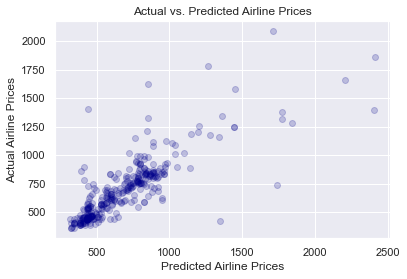

In [416]:
plt.scatter(y_test,y_test_pred,alpha =0.2,color="DarkBlue")
plt.title('Actual vs. Predicted Airline Prices')
plt.xlabel('Predicted Airline Prices')
plt.ylabel('Actual Airline Prices');

### Hyperparameter Tuning

In [417]:
# randomized search CV

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [418]:
# create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [419]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 8, cv = 5, verbose=2, n_jobs = 1)
rf_random.fit(X_train_val,y_train_val)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=1200; total time=   3.3s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=1200; total time=   3.5s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=1200; total time=   3.1s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=1200; total time=   2.9s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=1200; total time=   3.5s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_es

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=8, n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   scoring='neg_mean_squared_error', verbose=2)

In [420]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 10}

In [421]:
prediction = rf_random.predict(X_test)


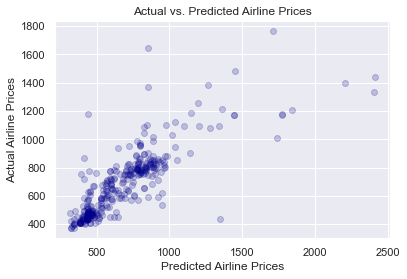

In [422]:
plt.scatter(y_test,prediction,alpha =0.2,color="DarkBlue")
plt.title('Actual vs. Predicted Airline Prices')
plt.xlabel('Predicted Airline Prices')
plt.ylabel('Actual Airline Prices');

In [423]:
print("MAE:" , metrics.mean_absolute_error(y_test,prediction))
print("MSE:" , metrics.mean_squared_error(y_test,prediction))
print("RMSE:" , np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MAE: 98.15842331298887
MSE: 30470.054629946993
RMSE: 174.55673756674932


In [424]:
test_df = pd.DataFrame({
    "Predicted Price" : rf.predict(X_test),
    "Actual Price" : y_test,
}).reset_index(drop = True)

test_df

,Predicted Price,Actual Price
0,437.210000,344
1,435.390083,475
2,455.840000,410
3,1400.370000,443
4,1245.050000,1445
...,...,...
339,487.985079,527
340,733.443333,1741
341,566.526904,434
342,564.270000,529


In [425]:
# saving the model
import pickle as pkl
file = open('rf_flightprice_prediction.pkl', 'wb')
pkl.dump(rf, file)

In [426]:
# open the model
model = open('rf_flight_prediction.pkl','rb')
rf_flight_prediction = pkl.load(model)

In [427]:
print(f'R2 score {metrics.r2_score(y_test,rf_flight_prediction.predict(X_test))}')
print("MAE:" , metrics.mean_absolute_error(y_test,rf_flight_prediction.predict(X_test)))
print("MSE:" , metrics.mean_squared_error(y_test,rf_flight_prediction.predict(X_test)))
print("RMSE:" , np.sqrt(metrics.mean_squared_error(y_test,rf_flight_prediction.predict(X_test))))

R2 score 0.65587020820137
MAE: 62.33693311888358
MSE: 31719.42027579546
RMSE: 178.09946736527726


## The final model is able to predict flight ticket prices within around = $62.33